<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:
           font-size:200%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">WEBSCRAPING USING BEAUTIFUL SOUP

    
</h2>
</div>
    
</center>



![](https://i.imgur.com/6zM7JBq.png)

**Web scraping** is a technique used to extract large amounts of data from websites. It is done by writing computer programs that visit web pages, parse the contents of the page, and extract data for further processing. Web scraping is important in data science because it allows businesses to collect data from websites, including news sites, social media, and other online sources, which can be used to analyze trends, measure customer sentiment, and create predictive models. 

It is also used to populate databases, monitor prices, and collect other types of information that can be used in data science projects. Web scraping is a powerful tool for data science, as it allows businesses to collect and analyze data from different sources quickly and cost-effectively.

**What are the several ways of webscraping?**

1. **API**: API (Application Programming Interface) is a set of protocols, routines, and tools for building software applications. APIs can be used to access web-based data and services, such as webpages, images, and other content. 

2. **HTML Parsers**: HTML parsers are programs that parse HTML documents and extract the data from them. They are usually used to access webpages and extract the content from them.

3. **Scrapy**: Scrapy is a Python-based web scraping framework that provides a complete toolkit for scraping websites. It can be used to crawl multiple pages, extract data from them, and store it in a structured format.

4. **Selenium**: Selenium is an open-source tool for automating web browsers. It can be used to simulate user actions on a web page and extract data from it.

5. **Wget/Curl**: Wget and Curl are command-line programs used to download webpages and other web-based resources. They can be used to access and scrape webpages.

We will be choosing the HTML Parser method for this notebook.

**Request to the viewer/ reader**

<div class="alert alert-block alert-info">
<p align="center"> <font color='black'>If you enjoyed my work and the effort, I would really appreciate it if you could show your support by upvoting the notebook. It would give the motivation I need to keep coming up with the helpful stuff for others. Thank you!</font></p>
</div>


<center> Let's begin! </center>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Importing Libraries

    
</h2>
</div>
    
</center>

In [2]:
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Making a request to the website

    
</h2>
</div>
    
</center>

In [3]:
url = 'https://www.shine.com/job-search/jobs?job_type=2&top_companies_boost=true&sort=1'
response = requests.get(url)
print('The response that we got back from the URL is', response.status_code)

The response that we got back from the URL is 200


Since we are getting 200 as response object, we are ready to proceed ahead. 


<div class="alert alert-block alert-info">
<p align="center">A Response 200 is an HTTP status code that signifies a successful request. This code is returned when a web browser or client successfully receives the requested web page from a server. It indicates that the server has processed the request without errors and has provided the requested content, typically in the form of a web page, document, or data. </p>
</div>

**BEAUTIFULSOUP**

For Scraping we will be using a Python Library called BeautifulSoup. Beautiful Soup is a Python library used for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping. Beautiful Soup provides a few simple methods and Pythonic idioms for navigating, searching, and modifying a parse tree: a toolkit for dissecting a document and extracting what you need. It doesn't take much code to write an application 

- Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. You don't have to think about encodings, unless the document doesn't specify an encoding and Beautiful Soup can't detect one. Then you just have to specify the original encoding.

- Beautiful Soup sits on top of popular Python parsers like lxml and html5lib, allowing you to try out different parsing strategies or trade speed for flexibility.

- Beautiful Soup parses anything you give it and does the tree traversal stuff for you. You can tell it "Find all the links", or "Find all the links of class externalLink", or "Find all the links whose urls match "foo.com", or "Find the table heading that's got bold text, then give me that text."

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Parsing HTML

    
</h2>
</div>
    
</center>

In [4]:
soup = BeautifulSoup(response.text,'html.parser')
html = soup.find_all('div')

The HTML contains the contents of the website in the HTML format.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Fetching Job Titles

    
</h2>
</div>
    
</center>

The select method allows a user to query a page using a CSS selector to find elements matching the selector. This can be used to find specific tags, classes, or ids in the page's HTML. Remember to not use `.text` method on a list as it will result in an error.

In [22]:
titles = [a.get_text(strip=True) for a in soup.select('strong.jobCard_pReplaceH2__xWmHg h2 a')]
print(titles)

['Customer Service Representative', 'Customer Service Executive', 'Business Development  Excutive', 'Voice Process Executive', 'Production Manager', 'Opening for HR Recruiter', 'Hiring For Sr Relationship Manager', 'Relationship Officer', 'Relationship Manager', 'Relationship Manager', 'Relationship Manager-Corporate Salary', 'Content Writer ( English) Full Time- Noida- Walk-In', 'Telecaller', 'Walk-In Interview Relationship Manager - Bokaro Steel C ...', 'Walk-In Interview Acquisition Manager (AAM/PAM) - Bokar ...', 'Customer Service Executive', 'Telecaller', 'International Non Voice Process - Diversity Focused', 'Medical Transcriptionist (Immediate Joiners)', 'Voice Process ( Domestic)']


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Fetching Employer Name

    
</h2>
</div>
    
</center>

FIND ALL
- The `find_all()` method in `BeautifulSoup` searches through a parsed document and returns a collection of all tags that match the criteria specified in the function’s arguments. 
- It searches through the entire tree of parsed code and returns a list of tags that match the given criteria. 
- It is an efficient way to search for specific tags and their contents in a parsed document.

In [23]:
firm_names = [span.get_text(strip=True) for span in soup.select('div.jobCard_jobCard_cName__mYnow span')]

In [24]:
firm_names[:5]

['FAST AND DIRECT SERVICES',
 'CONSULTBAE INDIA PRIVATE LIMITED',
 'DIGI ENTER.',
 'TAGINDIA CONSULTANCY SERVICES PRIVA...',
 'ARYA GOLD']

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Fetching Job Locations

    
</h2>
</div>
    
</center>

In [25]:
locations = [div.get_text(strip=True) for div in soup.select('div.jobCard_jobCard_lists_item__YxRkV.jobCard_locationIcon__zrWt2')]

In [26]:
locations[:5]

['Mumbai City', 'Bangalore', 'Delhi', 'Bangalore', 'Mumbai City']

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Fetching Experience

    
</h2>
</div>
    
</center>

We will use `re` which is a library meant for regular expressions. I have a whole notebook where I go in detail and provide various examples of extracting data from text using some patterns. Click [here](https://www.kaggle.com/code/bhatnagardaksh/introduction-to-regular-expressions) if you want to check it out.

In [27]:
experience = [div.get_text(strip=True) for div in soup.select('div.jobCard_jobCard_lists_item__YxRkV.jobCard_jobIcon__3FB1t')]


In [28]:
experience[:5]

['0 to 3 Yrs', '1 to 5 Yrs', '1 to 2 Yrs', '0 to 1 Yr', '2 to 5 Yrs']

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Fetching Number of Positions

    
</h2>
</div>
    
</center>

In [48]:
positions = [li.get_text(strip=True).replace(' Positions', '') for li in soup.select('div.jobCard_jobCard_lists_item__YxRkV.jobCard_positionIcon__2hhkm li')]

In [49]:
#Cleaning up the data
positions = [int(re.findall(r'\d+', text)[0]) if re.findall(r'\d+', text) else 1 for text in positions]

The above code cell might look like there is a lot going on and while that's true, let me break it down.

---
This fetches each element in the list
```Python
for text in vac
```
We then do the regex magic and get the first element and convert that number to an integer
```Python
int(re.findall(r'\d+', text)[0])
```
This part check if the element at an index is blank. If yes,then the value will default to 1
```Python
if re.findall(r'\d+', text) else 1 
```
---
We are using a list comprehension which is a better and faster way to loop things over.

In [38]:
positions[:5]

[20, 5, 30, 99, 4]

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Putting the pieces together

    
</h2>
</div>
    
</center>

In [50]:
min_length = min(len(titles), len(firm_names), len(locations), len(experience), len(positions))
max_length = max(len(titles), len(firm_names), len(locations), len(experience), len(positions))

# Function to extend the list to match the max length
def extend_list(lst, target_length, fill_value='N/A'):
    return lst + [fill_value] * (target_length - len(lst))

# Extending all lists to the max length
titles = extend_list(titles, max_length)
firm_names = extend_list(firm_names, max_length)
locations = extend_list(locations, max_length)
experience = extend_list(experience, max_length)
positions = extend_list(positions, max_length)

In [58]:
# Creating the DataFrame
data = {
    'Titles': titles,
    'Firm Name': firm_names,
    'Job Location': locations,
    'Experience': experience,
    'Positions': positions
}

df = pd.DataFrame(data)

df['Positions'] = pd.to_numeric(df['Positions'], errors='coerce')

# Fill NaN values with 0 or another appropriate value
df['Positions'].fillna(0, inplace=True)

# Convert Positions column to integers
df['Positions'] = df['Positions'].astype(int)

# Display the DataFrame
print(df.to_string(index=False))

                                                     Titles                              Firm Name    Job Location Experience  Positions
                            Customer Service Representative               FAST AND DIRECT SERVICES     Mumbai City 0 to 3 Yrs         20
                                 Customer Service Executive       CONSULTBAE INDIA PRIVATE LIMITED       Bangalore 1 to 5 Yrs          5
                             Business Development  Excutive                            DIGI ENTER.           Delhi 1 to 2 Yrs         30
                                    Voice Process Executive TAGINDIA CONSULTANCY SERVICES PRIVA...       Bangalore  0 to 1 Yr         99
                                         Production Manager                              ARYA GOLD     Mumbai City 2 to 5 Yrs          4
                                   Opening for HR Recruiter         Stalwart Management Consulting     Mumbai City 1 to 6 Yrs         10
                         Hiring For Sr Re

In [59]:
#Checking for duplicates based on the titles column (you can pick any other column of your choice)
df['Titles'].duplicated().sum()

3

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Dropping Duplicates

    
</h2>
</div>
    
</center>

Pandas dataframes use a hash table data structure to store the data. The hash table stores the data in a key-value pair, where the keys are the column names and the values are the row values. When a duplicate row is added to the dataframe, the key-value pair is checked against the existing entries in the hash table to see if a duplicate exists. If a duplicate is found, the duplicate row is not added to the dataframe.

In [60]:
#Dropping duplicates
df.drop_duplicates(subset='Titles', inplace=True)

In [61]:
#checking to see if those duplicates have been dropped or not
df['Titles'].duplicated().sum()

0

In [62]:
df.head()

,Titles,Firm Name,Job Location,Experience,Positions
0,Customer Service Representative,FAST AND DIRECT SERVICES,Mumbai City,0 to 3 Yrs,20
1,Customer Service Executive,CONSULTBAE INDIA PRIVATE LIMITED,Bangalore,1 to 5 Yrs,5
2,Business Development Excutive,DIGI ENTER.,Delhi,1 to 2 Yrs,30
3,Voice Process Executive,TAGINDIA CONSULTANCY SERVICES PRIVA...,Bangalore,0 to 1 Yr,99
4,Production Manager,ARYA GOLD,Mumbai City,2 to 5 Yrs,4


In [64]:
#Creating a New Column
df['Category'] = ['Fresher' if '0' in i else 'Experienced' for i in df['Experience']]

The logic to create this new column is that if the required experience is within the bounds of 2 or 3 years, candidates are usually thought of as a relative Fresher and this column should make it easy to sift through the data for anyone interested.

In [65]:
#DataFrame created based on Descending values 
final_df = df.sort_values(by='Positions', ascending=False)
final_df.head()

,Titles,Firm Name,Job Location,Experience,Positions,Category
3,Voice Process Executive,TAGINDIA CONSULTANCY SERVICES PRIVA...,Bangalore,0 to 1 Yr,99,Fresher
17,International Non Voice Process - Diversity Fo...,Intouch CX,Hyderabad,0 to 2 Yrs,99,Fresher
6,Hiring For Sr Relationship Manager,RELIANCE NIPPON LIFE INSURANCE COMP...,Indore,1 to 6 Yrs,99,Experienced
14,Walk-In Interview Acquisition Manager (AAM/PAM...,Kotak Mahindra Bank Limited,Bokaro,0 to 4 Yrs,99,Fresher
18,Medical Transcriptionist (Immediate Joiners),Intouch CX,All India,2 to 4 Yrs,50,Experienced


Now if there are several pages one could also write a loop for the rest of the pages which is what has been done in the code cell below.

In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

TITLES = []
COMPANIES = []
LOCATIONS = []
EXPERIENCE = []
VACANCIES = []

Range = range(1, 6)
for i in Range:
    link = f'https://www.shine.com/job-search/jobs-{i}?job_type=2&top_companies_boost=true&sort=1'
    response = requests.get(link)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Fetching job titles
        req = soup.select('strong.jobCard_pReplaceH2__xWmHg h2 a')
        titles = [r.text for r in req]
        TITLES.extend(titles)
        
        # Fetching company names
        orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
        companies = [o.text.strip() for o in orgs]
        COMPANIES.extend(companies)
        
        # Fetching job locations
        loc = soup.find_all('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_locationIcon__zrWt2')
        locations = [l.text.strip() for l in loc]
        LOCATIONS.extend(locations)
        
        # Fetching experience
        exp = soup.find_all('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_jobIcon__3FB1t')
        experience = [e.text.strip() for e in exp]
        EXPERIENCE.extend(experience)
        
        # Fetching number of positions
        vac = soup.find_all('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_positionIcon__2hhkm')
        vacancies = [int(re.findall(r'\d+', v.text)[0]) if re.findall(r'\d+', v.text) else 0 for v in vac]
        VACANCIES.extend(vacancies)
        
    else:
        print(f'Invalid Response for page {i}')

# Aligning the lengths of all lists by filling missing positions with a placeholder (e.g., None or 0)
max_length = max(len(TITLES), len(COMPANIES), len(LOCATIONS), len(EXPERIENCE), len(VACANCIES))

def extend_list(lst, target_length, fill_value=0):
    return lst + [fill_value] * (target_length - len(lst))

TITLES = extend_list(TITLES, max_length)
COMPANIES = extend_list(COMPANIES, max_length)
LOCATIONS = extend_list(LOCATIONS, max_length)
EXPERIENCE = extend_list(EXPERIENCE, max_length)
VACANCIES = extend_list(VACANCIES, max_length)

# Creating the DataFrame
df = pd.DataFrame({
    'Job Title': TITLES, 
    'Employer': COMPANIES,
    'Job Location': LOCATIONS, 
    'Experience': EXPERIENCE, 
    'Positions': VACANCIES
})

# Displaying the DataFrame
print(df.to_string(index=False))

print(f'We have managed to fetch {len(df)} job postings while scraping {len(Range)} pages.')


                                                  Job Title                               Employer                                   Job Location Experience  Positions
                              Platinum Relationship Manager            Kotak Mahindra Bank Limited                                      Hyderabad 2 to 6 Yrs          4
                                       Tele Sales Executive MIVIAN INTERNATIONAL PRIVATE LIMITE...                                    Bhubaneswar 1 to 3 Yrs         20
                            Customer Service Representative               FAST AND DIRECT SERVICES                                    Mumbai City 0 to 3 Yrs          5
                                 Customer Service Executive       CONSULTBAE INDIA PRIVATE LIMITED                                      Bangalore 1 to 5 Yrs         30
                             Business Development  Excutive                            DIGI ENTER.                                          Delhi 1 to 2 Yrs    

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;"> Visualizing Data

    
</h2>
</div>
    
</center>

In [69]:
#Dropping the duplicates and adding the new column
df = df.drop_duplicates(subset=['Job Title'])
df['Category'] = ['Fresher' if '0' in i else 'Experienced' for i in df['Experience']]

In [70]:
df.head()

,Job Title,Employer,Job Location,Experience,Positions,Category
0,Platinum Relationship Manager,Kotak Mahindra Bank Limited,Hyderabad,2 to 6 Yrs,4,Experienced
1,Tele Sales Executive,MIVIAN INTERNATIONAL PRIVATE LIMITE...,Bhubaneswar,1 to 3 Yrs,20,Experienced
2,Customer Service Representative,FAST AND DIRECT SERVICES,Mumbai City,0 to 3 Yrs,5,Fresher
3,Customer Service Executive,CONSULTBAE INDIA PRIVATE LIMITED,Bangalore,1 to 5 Yrs,30,Experienced
4,Business Development Excutive,DIGI ENTER.,Delhi,1 to 2 Yrs,99,Experienced


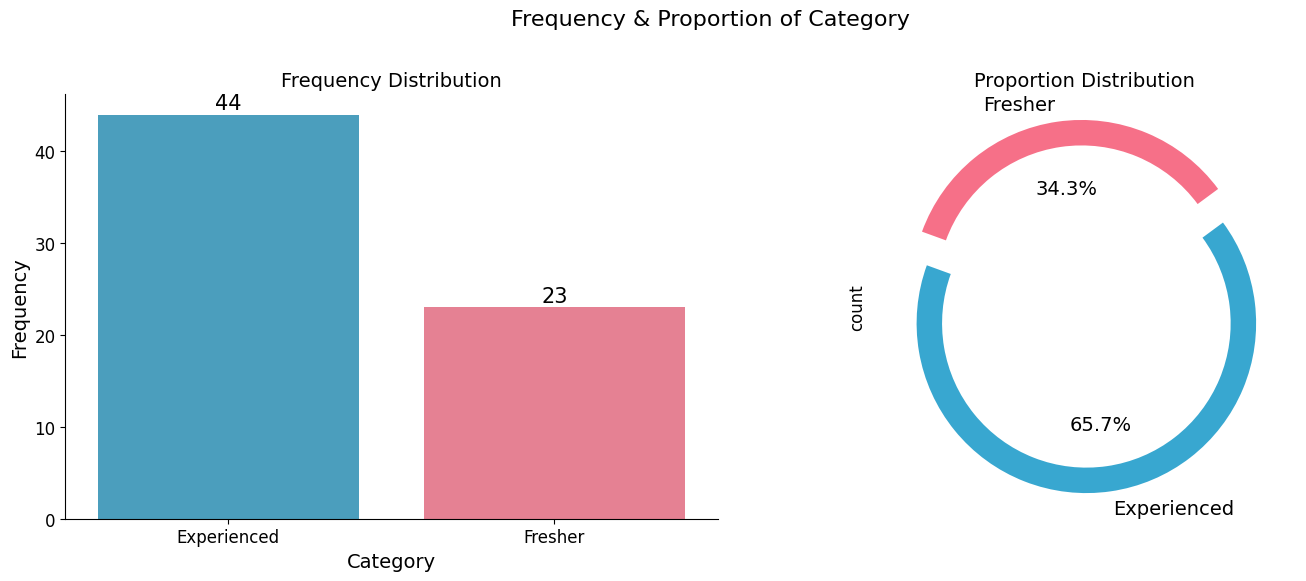

In [71]:
palette = ['#38A7D0', '#F67088']
fig = plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Category', data = df, palette = palette)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.xlabel(xlabel = 'Category', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(len(df.Category.unique()))/10
df['Category'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', 
                                 wedgeprops = dict(width=0.15), startangle = 160, figsize = [15, 6], legend = False,
                                  colors=palette)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Category', y = 1.02, size = 16)
plt.show()

From the chart above, we can clearly see there are more job openings for Freshers as compared to the Experienced Professionals.

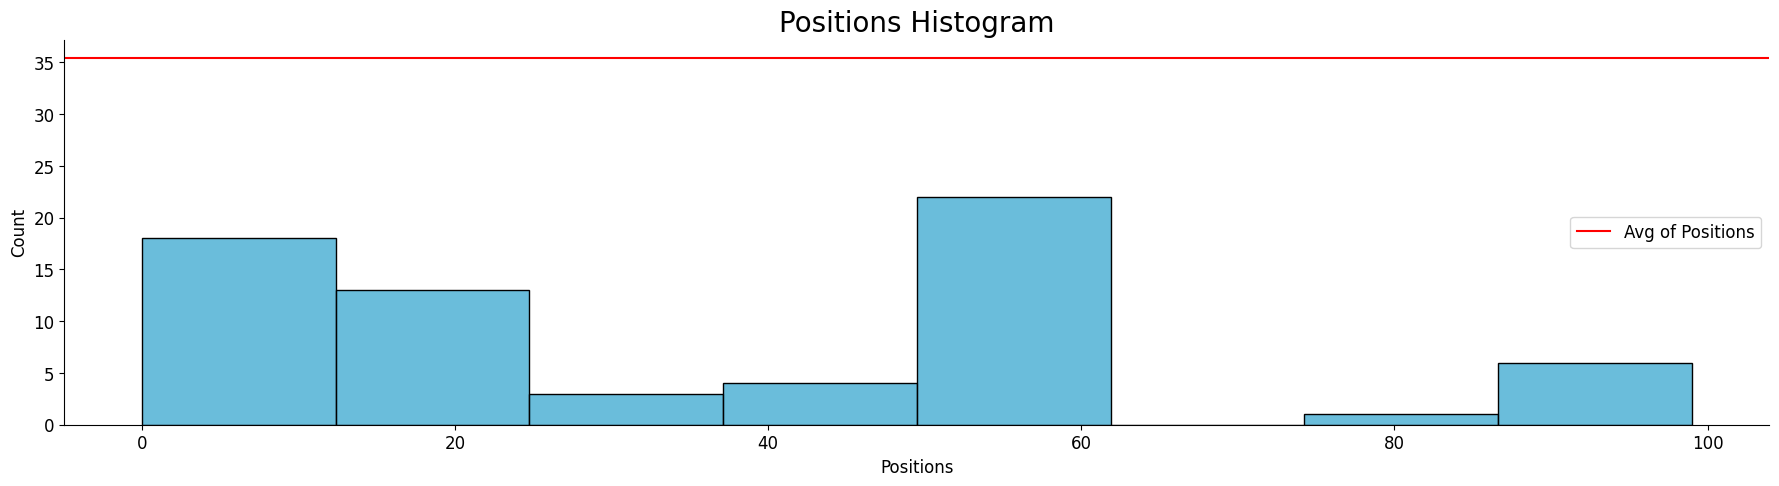

In [72]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.histplot(df['Positions'], color = palette[0])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Positions Histogram', fontsize=20)
plt.axhline(df.Positions.mean(), color='red')
plt.legend(['Avg of Positions'])
plt.show()

Clearly, job openings are more in the range of 0 to 15 on a whole.

Showing the results for first 10 firms only

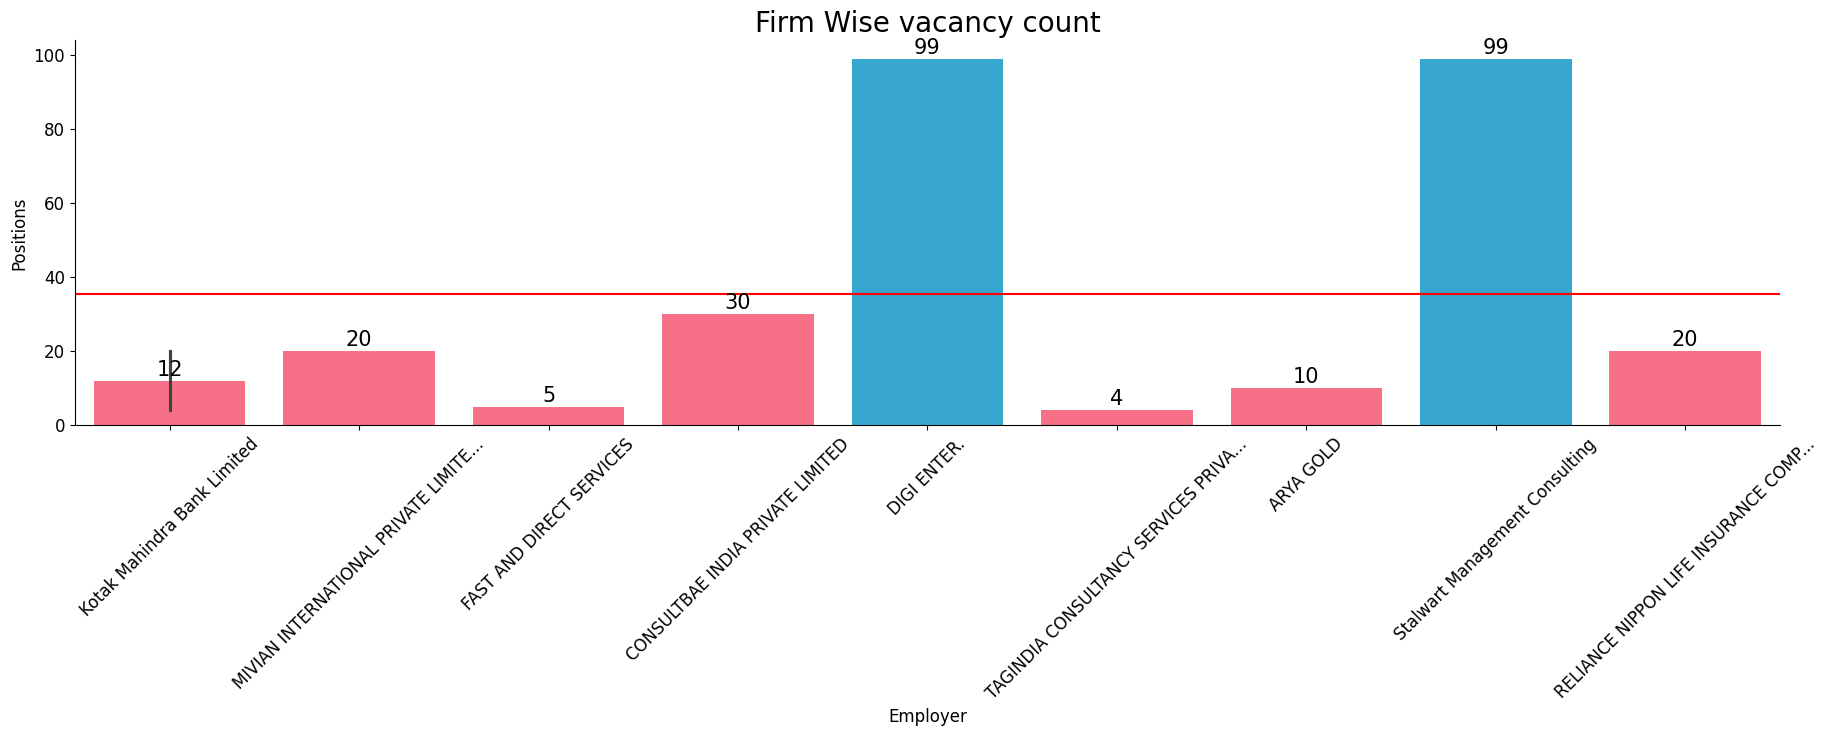

In [73]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.barplot(x=df['Employer'][:10], y=df['Positions'][:10])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Firm Wise vacancy count', fontsize=20)
plt.axhline(df.Positions.mean(), color='red')

#Annotating each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

#coloring each bar based on a condition if the bar value is greator or less than count of positions for a given firm 
for i in range(len(ax.patches)):
    #getting the count of each bar
    counts = [p.get_height() for p in ax.patches]
    #getting the colors based on the condition for each bar
    colors = ['#38A7D0' if j > df.Positions.mean() else '#F67088' for j in counts]
    #passing the color for each bar
    ax.patches[i].set_facecolor(colors[i])  
    
plt.xticks(rotation=45)
plt.show()

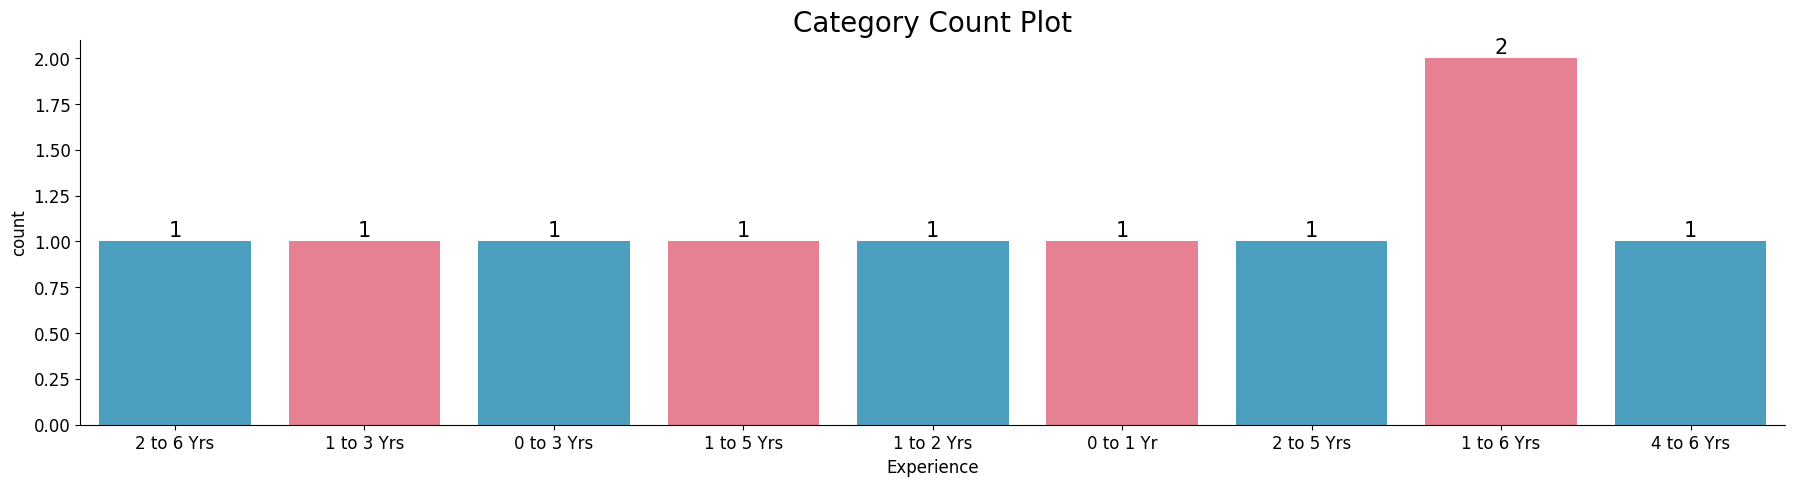

In [74]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.countplot(data =df,x=df['Experience'][:10], hue=df['Experience'][:10], dodge=False, palette=palette)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Category Count Plot', fontsize=20)
plt.show()

## CONCLUSION

In this Jupyter Notebook, we have implemented a web scraping script to extract job-related data from a website. The script goes through the following steps to gather information:

1. **Sending HTTP Requests**: We use the `requests` library to send HTTP GET requests to the constructed URLs. We check the status code of the response to ensure that we receive a successful response (HTTP status code 200) before proceeding.

2. **Parsing HTML Content**: Upon successful retrieval of a web page, we used the `BeautifulSoup` library to parse the HTML content of the page. This enabled us to navigate the page's structure and extract relevant information.

3. **Extracting Data**: We learnt how to navigate the HTML of a website to get the required data, stored in various classes, we are after. In our case, we went to get the job titles, company names, locations, and experience requirements. We also created a new column based on our existing data.

4. **Looping through Pages**: Once we got the hang of how to do this for one page, we iterated through a range of pages, where each page contains a list of job postings. For each page, we construct a URL with the page number and specific query parameters related to job type, top companies, and sorting.

5. **Visualizing Data**: We also took a look at some charts to understand our data i.e what is data distribution of Number of Positions, How many jobs in the market are for freshers and for experienced professionals.

By following these steps, we systematically gather data from multiple web pages, ensuring that we handle variations in the format of information such as job titles, company names, locations, and experience requirements. The use of regular expressions allowed us to extract specific patterns from the text, enhancing the accuracy of our data extraction process.

This overall helped strengthen our understanding of how to fetch the unstructured data and structure it into a more meaningful and readable mannner. 

Thanks for the time to go through my notebook.

In [77]:
import sqlite3

In [79]:
!pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
  Using cached SQLAlchemy-2.0.30-cp312-cp312-win_amd64.whl.metadata (9.8 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 325.1 kB/s eta 0:00:07
   - -------------------------------------- 0.1/2.1 MB 469.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/2.1 MB 853.3 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.1 MB 1.0 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.1 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.1 MB 1.3 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.1 MB 1.4 MB/s eta 0:00:02
   ----------- ---------------------------- 0.6/2.1 MB 1.5 MB/s eta 0:00:02
   ------------ --------

In [82]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
# import sqlite3
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

# Database setup using SQLAlchemy with SQLite
DATABASE_URL = 'sqlite:///job.db'  # SQLite database

engine = create_engine(DATABASE_URL)
Session = sessionmaker(bind=engine)
session = Session()
Base = declarative_base()

class Job(Base):
    __tablename__ = 'job'
    id = Column(Integer, primary_key=True)
    job_title = Column(String)
    employer = Column(String)
    job_location = Column(String)
    experience = Column(String)
    positions = Column(Integer)

# Create the table
Base.metadata.create_all(engine)

# Function to fetch and store data
def fetch_and_store_data():
    TITLES = []
    COMPANIES = []
    LOCATIONS = []
    EXPERIENCE = []
    VACANCIES = []

    Range = range(1, 6)
    for i in Range:
        link = f'https://www.shine.com/job-search/jobs-{i}?job_type=2&top_companies_boost=true&sort=1'
        response = requests.get(link)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')

            # Fetching job titles
            req = soup.select('strong.jobCard_pReplaceH2__xWmHg h2 a')
            titles = [r.text for r in req]
            TITLES.extend(titles)
            
            # Fetching company names
            orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
            companies = [o.text.strip() for o in orgs]
            COMPANIES.extend(companies)
            
            # Fetching job locations
            loc = soup.find_all('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_locationIcon__zrWt2')
            locations = [l.text.strip() for l in loc]
            LOCATIONS.extend(locations)
            
            # Fetching experience
            exp = soup.find_all('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_jobIcon__3FB1t')
            experience = [e.text.strip() for e in exp]
            EXPERIENCE.extend(experience)
            
            # Fetching number of positions
            vac = soup.find_all('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_positionIcon__2hhkm')
            vacancies = [int(re.findall(r'\d+', v.text)[0]) if re.findall(r'\d+', v.text) else 0 for v in vac]
            VACANCIES.extend(vacancies)
        
        else:
            print(f'Invalid Response for page {i}')

    # Aligning the lengths of all lists by filling missing positions with 0
    max_length = max(len(TITLES), len(COMPANIES), len(LOCATIONS), len(EXPERIENCE), len(VACANCIES))

    def extend_list(lst, target_length, fill_value=0):
        return lst + [fill_value] * (target_length - len(lst))

    TITLES = extend_list(TITLES, max_length)
    COMPANIES = extend_list(COMPANIES, max_length)
    LOCATIONS = extend_list(LOCATIONS, max_length)
    EXPERIENCE = extend_list(EXPERIENCE, max_length)
    VACANCIES = extend_list(VACANCIES, max_length)

    # Creating the DataFrame
    df = pd.DataFrame({
        'Job Title': TITLES, 
        'Employer': COMPANIES,
        'Job Location': LOCATIONS, 
        'Experience': EXPERIENCE, 
        'Positions': VACANCIES
    })

    # Insert data into the database
    for index, row in df.iterrows():
        job = Job(
            job_title=row['Job Title'],
            employer=row['Employer'],
            job_location=row['Job Location'],
            experience=row['Experience'],
            positions=row['Positions']
        )
        session.add(job)
    session.commit()

    print(f'We have managed to fetch {len(df)} job postings while scraping {len(Range)} pages.')

# Fetch and store data
fetch_and_store_data()

# Query the database to verify
def fetch_jobs_from_db():
    jobs = session.query(Job).all()
    for job in jobs:
        print(f"Job Title: {job.job_title}, Employer: {job.employer}, Location: {job.job_location}, Experience: {job.experience}, Positions: {job.positions}")

fetch_jobs_from_db()

We have managed to fetch 80 job postings while scraping 5 pages.
Job Title: Platinum Relationship Manager, Employer: Kotak Mahindra Bank Limited, Location: Hyderabad, Experience: 2 to 6 Yrs, Positions: 4
Job Title: Tele Sales Executive, Employer: MIVIAN INTERNATIONAL PRIVATE LIMITE..., Location: Bhubaneswar, Experience: 1 to 3 Yrs, Positions: 20
Job Title: Customer Service Representative, Employer: FAST AND DIRECT SERVICES, Location: Mumbai City, Experience: 0 to 3 Yrs, Positions: 5
Job Title: Customer Service Executive, Employer: CONSULTBAE INDIA PRIVATE LIMITED, Location: Bangalore, Experience: 1 to 5 Yrs, Positions: 30
Job Title: Business Development  Excutive, Employer: DIGI ENTER., Location: Delhi, Experience: 1 to 2 Yrs, Positions: 99
Job Title: Voice Process Executive, Employer: TAGINDIA CONSULTANCY SERVICES PRIVA..., Location: Bangalore, Experience: 0 to 1 Yr, Positions: 4
Job Title: Production Manager, Employer: ARYA GOLD, Location: Mumbai City, Experience: 2 to 5 Yrs, Positio

In [83]:
def fetch_jobs_in_bangalore():
    bangalore_jobs = session.query(Job).filter(Job.job_location.ilike('%Bangalore%')).all()
    for job in bangalore_jobs:
        print(f"Job Title: {job.job_title}, Employer: {job.employer}, Location: {job.job_location}, Experience: {job.experience}, Positions: {job.positions}")

# Fetch and print jobs in Bangalore
fetch_jobs_in_bangalore()

Job Title: Customer Service Executive, Employer: CONSULTBAE INDIA PRIVATE LIMITED, Location: Bangalore, Experience: 1 to 5 Yrs, Positions: 30
Job Title: Voice Process Executive, Employer: TAGINDIA CONSULTANCY SERVICES PRIVA..., Location: Bangalore, Experience: 0 to 1 Yr, Positions: 4
Job Title: Java Back-end Developers, Employer: Sunil Kumar Hiring For SKS, Location: Bangalore+4Chennai, Hyderabad, Gurugram, Delhi, Experience: 2 to 7 Yrs, Positions: 10
Job Title: Customer Support - Voice, Employer: Wroots Global Private Limited, Location: Bangalore, Experience: 0 to 4 Yrs, Positions: 32
Job Title: Walkin for HR Executive ,Client Coordinator  - PERSONAL ..., Employer: PERSONAL NETWORK., Location: Bangalore, Experience: 0 to 3 Yrs, Positions: 40
Job Title: Sales Coordinator, Employer: Adroitt Medisys Solutions, Location: Bangalore, Experience: 1 to 4 Yrs, Positions: 50
Job Title: Sales Coordinator, Employer: Adroitt Medisys Solutions, Location: Bangalore, Experience: 1 to 4 Yrs, Positions